In [1]:
%matplotlib inline


# Recognizing hand-written digits


An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
`tutorial section of the user manual <introduction>`.




Automatically created module for IPython interactive environment
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        86
           3       0.99      1.00      0.99        91
           4       1.00      1.00      1.00        92
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        91
           7       1.00      1.00      1.00        89
           8       1.00      1.00      1.00        88
           9       1.00      0.99      0.99        92

    accuracy                           1.00       899
   macro avg     

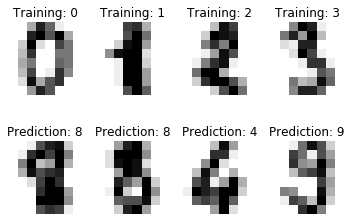

In [2]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
# https://scikit-learn.org/stable/modules/svm.html#svc
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
#classifier.fit(data[:n_samples // 2:], digits.target[:n_samples // 2:])

# for this example we will learn on entire data set for 
# custom images recongition below, this does not make sense for 
# model accuracy measurement, however is required for custom image recgnition
# because of limited data set
classifier.fit(data[:n_samples], digits.target[:n_samples])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

# Routines to prepare digit image for recognition

In [3]:
import matplotlib.image as mpimg
import numpy as np
from PIL import Image, ImageChops

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def auto_crop(image_file_path):
    cropped_image_file_path = f'{image_file_path}_cropped.png'
    
    img = Image.open(image_file_path)
    
    print('Image - original')
    display(img)
    
    bg = Image.new(img.mode, img.size, img.getpixel((0,0)))
    diff = ImageChops.difference(img, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    img_cropped = img.crop(bbox)
    
    print('Image - cropped')
    display(img_cropped)
    
    img_cropped.save(cropped_image_file_path)
    
    return cropped_image_file_path
    
def scale_image(image_file_path):
    scaled_image_file_path = f'{image_file_path}_8x8.png'
    
    img = Image.open(image_file_path)    
    img = img.resize([8, 8], Image.LANCZOS)
    img.save(scaled_image_file_path)
    
    return scaled_image_file_path

def recognize_digit(image_file_path):
    cropped_image_file_path = auto_crop(image_file_path)
    scaled_image_file_path = scale_image(image_file_path)
    
    img = mpimg.imread(scaled_image_file_path)
    gray = rgb2gray(img)
    a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
    print('Image - scaled, cropped and in gray scale')
    plt.imshow(a, cmap = plt.get_cmap('gray_r'))    
    plt.show()
    
    img_data = a.flatten().reshape(1, -1)
    print('Image - vector')
    print(img_data)
    
    predicted = classifier.predict(img_data)
    print(f'Recognized digit is = {predicted}')

# Recognize custom images

## Reconize number 1

Image - original


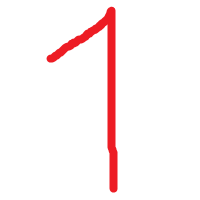

Image - cropped


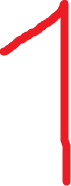

Image - scaled, cropped and in gray scale


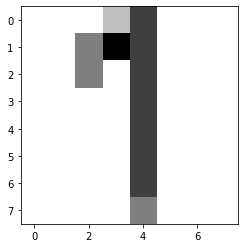

Image - vector
[[0 0 0 1 3 0 0 0 0 0 2 4 3 0 0 0 0 0 2 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
  3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0 0 0]]
Recognized digit is = [1]


In [4]:
recognize_digit('Example02/Digits/01.png')

## Reconize number 4

Image - original


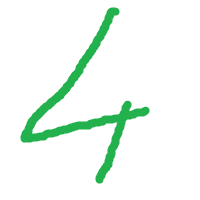

Image - cropped


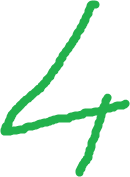

Image - scaled, cropped and in gray scale


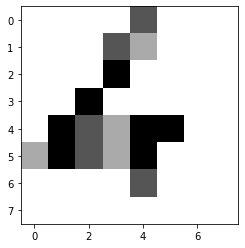

Image - vector
[[0 0 0 0 2 0 0 0 0 0 0 2 1 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 3 2 1
  3 3 0 0 1 3 2 1 3 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]]
Recognized digit is = [4]


In [5]:
recognize_digit('Example02/Digits/04.png')

## Reconize number 9

Image - original


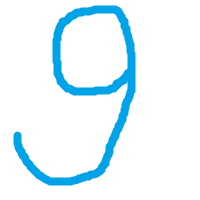

Image - cropped


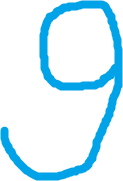

Image - scaled, cropped and in gray scale


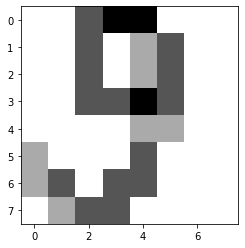

Image - vector
[[0 0 2 3 3 0 0 0 0 0 2 0 1 2 0 0 0 0 2 0 1 2 0 0 0 0 2 2 3 2 0 0 0 0 0 0
  1 1 0 0 1 0 0 0 2 0 0 0 1 2 0 2 2 0 0 0 0 1 2 2 0 0 0 0]]
Recognized digit is = [9]


In [6]:
recognize_digit('Example02/Digits/09.png')